In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [25]:
#데이터 나누기
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [26]:
#이거를 8:2로 나눌거야
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=.2)

In [7]:
import matplotlib.pyplot as plt

In [27]:
#모델만들기 #tensor board깔거야:: pytorch에도 먹힘
class_name = ['T-shirt/top'
,'Trouser'
,'Pullover'
,'Dress'
,'Coat'
,'Sandal'
,'Shirt'
,'Sneaker'
,'Bag'
,'Ankle boot']

class_name[y_train[0]]

'Shirt'

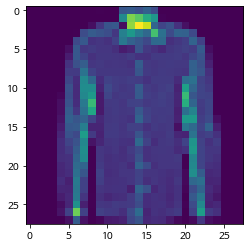

In [9]:
plt.imshow(X_train[0])

In [10]:
X_train.shape

(48000, 28, 28)

In [28]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Dense(300,activation='relu',input_shape=(28*28,)))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras import activations

dir(activations)

['ELU',
 'InputSpec',
 'Layer',
 'LeakyReLU',
 'PReLU',
 'ReLU',
 'Softmax',
 'ThresholdedReLU',
 '_TF_ACTIVATIONS_V2',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_large_compatible_negative',
 'advanced_activations',
 'backend',
 'constraints',
 'deserialize',
 'deserialize_keras_object',
 'elu',
 'exponential',
 'gelu',
 'get',
 'get_globals',
 'hard_sigmoid',
 'initializers',
 'keras_export',
 'leaky_relu',
 'linear',
 'log_softmax',
 'regularizers',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'serialize_keras_object',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh',
 'tf',
 'tf_utils']

In [14]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(300,keras.activations.relu,input_shape=(28*28,))) #activ 이렇게 받으면 lr조절 가능(늘릴 수 있음)
model2.add(keras.layers.Dense(100,keras.activations.relu)) 
model2.add(keras.layers.Dense(10,keras.activations.softmax))

In [15]:
from keras import optimizers

dir(optimizers)

['Optimizer',
 'TFOptimizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta_experimental',
 'adadelta_v2',
 'adagrad_experimental',
 'adagrad_v2',
 'adam_experimental',
 'adam_v2',
 'adamax_v2',
 'backend',
 'deserialize',
 'deserialize_keras_object',
 'ftrl',
 'get',
 'gradient_descent_v2',
 'keras_export',
 'nadam_v2',
 'optimizer_experimental',
 'optimizer_v2',
 'rmsprop_v2',
 'serialize',
 'serialize_keras_object',
 'sgd_experimental',
 'tf']

In [16]:
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=['accuracy'])

In [17]:
#배치사이즈 때문에 바꿔준다 #한번 하고 fit만 다시 돌릴거면 주석 처리해야 사이즈가 맞을거임
X_train = X_train.reshape(-1,28*28)
X_validation = X_validation.reshape(-1,28*28)
#y_train은 원핫으로 바꿔준다
y_train = keras.utils.to_categorical(y_train)
y_validation = keras.utils.to_categorical(y_validation)

In [18]:
model2.fit(X_train,
          y_train,
          epochs=20,
          batch_size=400,
          validation_data=(X_validation,y_validation))

Epoch 1/20
120/120 [==============================] - 1s 4ms/step - loss: 27.9421 - accuracy: 0.5754 - val_loss: 1.1175 - val_accuracy: 0.6770
Epoch 2/20
120/120 [==============================] - 0s 3ms/step - loss: 0.9488 - accuracy: 0.6996 - val_loss: 0.8917 - val_accuracy: 0.7167
Epoch 3/20
120/120 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.7342 - val_loss: 0.8145 - val_accuracy: 0.7419
Epoch 4/20
120/120 [==============================] - 0s 4ms/step - loss: 0.7354 - accuracy: 0.7509 - val_loss: 0.7649 - val_accuracy: 0.7573
Epoch 5/20
120/120 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.7641 - val_loss: 0.7306 - val_accuracy: 0.7632
Epoch 6/20
120/120 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.7750 - val_loss: 0.7006 - val_accuracy: 0.7708
Epoch 7/20
120/120 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.7812 - val_loss: 0.6859 - val_accuracy: 0.7690
Epoch

In [19]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=([28,28])))
model2.add(keras.layers.Dense(300,keras.activations.relu)) 
model2.add(keras.layers.Dense(100,keras.activations.relu)) 
model2.add(keras.layers.Dense(10,keras.activations.softmax))
           
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## model3

In [33]:
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, 
                                                                test_size=0.2)
class_name =['T-shirt/top'
,'Trouser'
,'Pullover'
,'Dress'
,'Coat'
,'Sandal'
,'Shirt'
,'Sneaker'
,'Bag'
,'Ankle boot']



In [34]:
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
#마지막이 10이니깐 바꿔줘야지
y_train = keras.utils.to_categorical(y_train)
y_validation = keras.utils.to_categorical(y_validation)

In [36]:
model3.fit(X_train,
           y_train,
           epochs=20,
           batch_size=400,
           validation_data=(X_validation,y_validation))

Epoch 1/20
120/120 [==============================] - 1s 4ms/step - loss: 0.5215 - accuracy: 0.8164 - val_loss: 0.5155 - val_accuracy: 0.8185
Epoch 2/20
120/120 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.8178 - val_loss: 0.5116 - val_accuracy: 0.8200
Epoch 3/20
120/120 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.8216 - val_loss: 0.5113 - val_accuracy: 0.8180
Epoch 4/20
120/120 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.8224 - val_loss: 0.5110 - val_accuracy: 0.8190
Epoch 5/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.8241 - val_loss: 0.5099 - val_accuracy: 0.8202
Epoch 6/20
120/120 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.8265 - val_loss: 0.5073 - val_accuracy: 0.8213
Epoch 7/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.8307 - val_loss: 0.4999 - val_accuracy: 0.8227
Epoch 

In [37]:
model3 = Sequential(
    [
        keras.layers.Flatten(input_shape=([28,28])),
        keras.layers.Dense(300,keras.activations.relu),
        keras.layers.Dense(100,keras.activations.relu),
        keras.layers.Dense(10,keras.activations.softmax)
    ]
)

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
